# DUP

In [1]:
# FIND WHICH FEATURES ARE MOST IMPORTANT FOR PREDICTING user+system TIME (rank them in order)

# (2) then add ppn & dataset size - rank them again

import pandas as pd

In [2]:
df = pd.read_csv("testing_22July.csv", sep=",") #data from 22July2016 
# copy the 'dup' folder to ~/ProfilingData/.
# remove *Output* files 
# run "python extract.py dup/" to generate testing.csv

In [3]:
len(df)

32

In [4]:
df.head(n=1)

,ppn,mem,seqlen,trial,AvgRSS,AvgSharedTxt,AvgStack,AvgTotal,AvgUnsharedData,CommandTimed,...,PageSize,PercentCPU,SignalsDeliv,SocketMsgRecv,SocketMsgSent,Swaps,SystemTime,UserTime,VolCtxtSwitch,WallTime
0,11,64G,10M,1,0,0,0,0,0,./NGS-ann-program/BIN/cd-hit-dup -i ./data/no-...,...,4096,99%,0,0,0,0,3.5,42.32,1072,0:45.97


In [5]:
#find which columns are completely empty
a=len(df[df['AvgRSS'] > 0])
b=len(df[df['AvgSharedTxt'] > 0])
c=len(df[df['AvgStack'] > 0])
d=len(df[df['AvgTotal'] > 0])
e=len(df[df['AvgUnsharedData'] > 0])

print(a,b,c,d,e)

0 0 0 0 0


In [6]:
header = list(df.columns)

In [7]:
i = 1
a = 0
emptyColumns = []
for h in header:
    try:
        a=len(df[df[h] > 0])
        print(a,  h)
        if(a==0): #nothing is greater than zero for this column
            emptyColumns.append(h)
    except:
        print('......................'+ h +' not a scalar')
    i=i+1

32 ppn
......................mem not a scalar
......................seqlen not a scalar
32 trial
0 AvgRSS
0 AvgSharedTxt
0 AvgStack
0 AvgTotal
0 AvgUnsharedData
......................CommandTimed not a scalar
0 ExitStatus
32 FileSysIn
32 FileSysOut
32 InvolCtxtSwitch
32 MajorFaults
32 MaxRSS
32 MinorFaults
32 PageSize
......................PercentCPU not a scalar
0 SignalsDeliv
0 SocketMsgRecv
0 SocketMsgSent
0 Swaps
32 SystemTime
32 UserTime
32 VolCtxtSwitch
......................WallTime not a scalar


In [8]:
emptyColumns.append('trial')
#emptyColumns.append('PageSize')
emptyColumns.append('CommandTimed')
emptyColumns.append('WallTime')

In [9]:
for c in emptyColumns:
    del df[c]

In [10]:
df.head(5)

,ppn,mem,seqlen,FileSysIn,FileSysOut,InvolCtxtSwitch,MajorFaults,MaxRSS,MinorFaults,PageSize,PercentCPU,SystemTime,UserTime,VolCtxtSwitch
0,11,64G,10M,3234924,2179426,212,3,6544812,1388550,4096,99%,3.50,42.32,1072
1,11,64G,15M,4915882,3320366,608,3,9621592,2150793,4096,99%,5.43,62.54,1634
2,11,64G,20M,6599917,4467723,366,3,13416152,2892383,4096,99%,7.44,91.03,2228
3,11,64G,25M,8250892,5591773,4795,3,16387764,3612806,4096,99%,9.36,111.08,2746
4,11,64G,30M,9788169,6637009,164,3,19447720,4284645,4096,99%,11.16,130.50,3264


In [11]:
ft = df.copy(deep=True)

In [12]:
whatisthesize = {'5M': .54, '10M': 1.2,'15M': 1.7,'20M': 2.3,'25M': 2.9,'30M': 3.4,'35M': 4.0,'40M': 4.5}

In [13]:
ft['sizeGB'] = ft['seqlen'].map(whatisthesize)

In [14]:
del ft['seqlen']
ft.head(2)

,ppn,mem,FileSysIn,FileSysOut,InvolCtxtSwitch,MajorFaults,MaxRSS,MinorFaults,PageSize,PercentCPU,SystemTime,UserTime,VolCtxtSwitch,sizeGB
0,11,64G,3234924,2179426,212,3,6544812,1388550,4096,99%,3.50,42.32,1072,1.2
1,11,64G,4915882,3320366,608,3,9621592,2150793,4096,99%,5.43,62.54,1634,1.7


In [15]:
#convert % to float
ft['Percentcpu']=ft['PercentCPU'].str.replace('[%*]', '').astype(float)/100
ft['memGB']=ft['mem'].str.replace('[G*]', '').astype(float)
ft['Y_Time']=ft['SystemTime']+ft['UserTime']
del ft['SystemTime']
del ft['UserTime']
del ft['mem']
del ft['PercentCPU']

In [16]:
ft.head(n=2)

,ppn,FileSysIn,FileSysOut,InvolCtxtSwitch,MajorFaults,MaxRSS,MinorFaults,PageSize,VolCtxtSwitch,sizeGB,Percentcpu,memGB,Y_Time
0,11,3234924,2179426,212,3,6544812,1388550,4096,1072,1.2,0.99,64.0,45.82
1,11,4915882,3320366,608,3,9621592,2150793,4096,1634,1.7,0.99,64.0,67.97


In [17]:
from sklearn.ensemble.forest import RandomForestRegressor
import numpy as np

In [18]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [19]:
np.random.seed()
ft['is_train']=np.random.uniform(0,1,len(ft)) <= .70
train, test = ft[ft['is_train']==True], ft[ft['is_train']==False]
del ft['is_train']
len(train)*1.0 / (len(test)+len(train))

0.5

In [20]:
ft.columns[0:12]

Index(['ppn', 'FileSysIn', 'FileSysOut', 'InvolCtxtSwitch', 'MajorFaults',
       'MaxRSS', 'MinorFaults', 'PageSize', 'VolCtxtSwitch', 'sizeGB',
       'Percentcpu', 'memGB'],
      dtype='object')

In [21]:
ft.columns[12]

'Y_Time'

In [22]:
features = ft.columns[0:12]
target = ft.columns[12]
X = train[features]
y = train[target].values
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [23]:
Y_prediction = model.predict(test[features])
Y_test = test[target].as_matrix()

#### Test vs Prediction

In [24]:
Y_test #Print Y values of test dataset

array([  67.97,  120.44,  141.66,  164.02,  204.8 ,   21.58,   46.36,
         97.49,  120.19,  141.54,   21.63,   45.94,   67.96,   97.83,
        120.67,   21.6 ])

In [25]:
Y_prediction #Print Y predicted values of test dataset

array([  72.0366,  123.1317,  136.9544,  169.9433,  200.4427,   33.6585,
         45.4325,   98.6518,  128.04  ,  140.0962,   33.3691,   46.8872,
         68.4059,   97.8618,  127.2123,   33.3691])

## Scoring with ppn and  seqlen

In [26]:
model.score(test[features], test[target]) #which score is this ?

0.98610716238862195

In [27]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(model, ft[features], ft[target], cv=10,scoring='mean_squared_error')

In [28]:
scores #-ve of MSE

array([ -5.04638192,  -7.39821499,  -1.09053228,  -3.48114542,
        -4.4776489 ,  -0.70497317,  -7.12510602,  -1.61317109,
        -9.46298714, -33.72292573])

In [29]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -7.41 (+/- 18.38)


In [30]:
ft[target].mean(), ft[target].std() * 2

(108.51031250000001, 118.18468799728724)

In [31]:
scores = cross_validation.cross_val_score(model, ft[features], ft[target], cv=10,scoring='r2')
print("Accuracy: %0.8f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99280635 (+/- 0.02)


## Ranking features without ppn and seqlen
#### (Feature importances with forests of trees)

In [32]:
importances = model.feature_importances_
importances

array([ 0.0022569 ,  0.15838886,  0.13716688,  0.04971607,  0.        ,
        0.14607663,  0.19147544,  0.        ,  0.1301747 ,  0.18474451,
        0.        ,  0.        ])

In [33]:
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s..................(%f)" % 
          (f + 1, indices[f],X.columns.values[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 6 MinorFaults..................(0.191475)
2. feature 9 sizeGB..................(0.184745)
3. feature 1 FileSysIn..................(0.158389)
4. feature 5 MaxRSS..................(0.146077)
5. feature 2 FileSysOut..................(0.137167)
6. feature 8 VolCtxtSwitch..................(0.130175)
7. feature 3 InvolCtxtSwitch..................(0.049716)
8. feature 0 ppn..................(0.002257)
9. feature 11 memGB..................(0.000000)
10. feature 10 Percentcpu..................(0.000000)
11. feature 7 PageSize..................(0.000000)
12. feature 4 MajorFaults..................(0.000000)


### Plot1

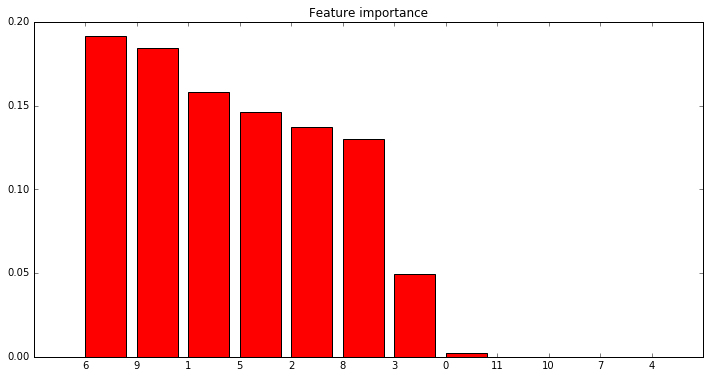

In [34]:
# Plot the feature importances of the forest
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.title("Feature importance")
plt.bar(range(X.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [35]:
ft.columns[0:12]

Index(['ppn', 'FileSysIn', 'FileSysOut', 'InvolCtxtSwitch', 'MajorFaults',
       'MaxRSS', 'MinorFaults', 'PageSize', 'VolCtxtSwitch', 'sizeGB',
       'Percentcpu', 'memGB'],
      dtype='object')

In [36]:
# [0 'ppn', 1 'FileSysIn', 2 'FileSysOut', 3 'InvolCtxtSwitch', 4 'MajorFaults',
# 5 'MaxRSS', 6 'MinorFaults', 7 'PageSize', 8 'VolCtxtSwitch', 9'sizeGB', 10 'Percentcpu', 11 'memGB']

### Plot2

<function matplotlib.pyplot.show>

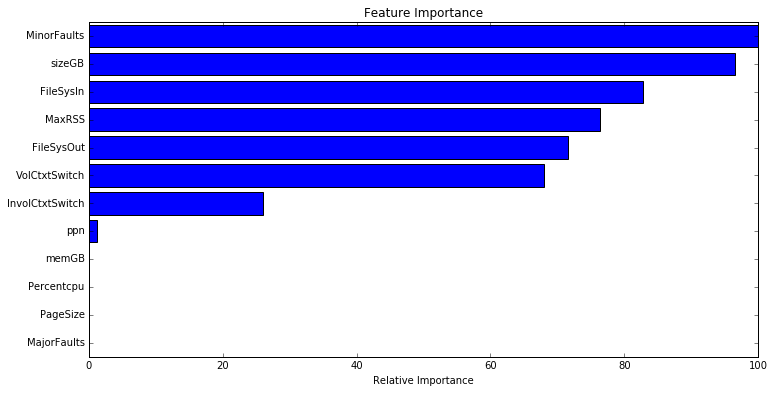

In [37]:
feature_importance = model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
#plt.subplot(1, 2, 2)
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show

# Recursive Feature Elimination with cross-validation

Automatically created module for IPython interactive environment
Optimal number of features : 5


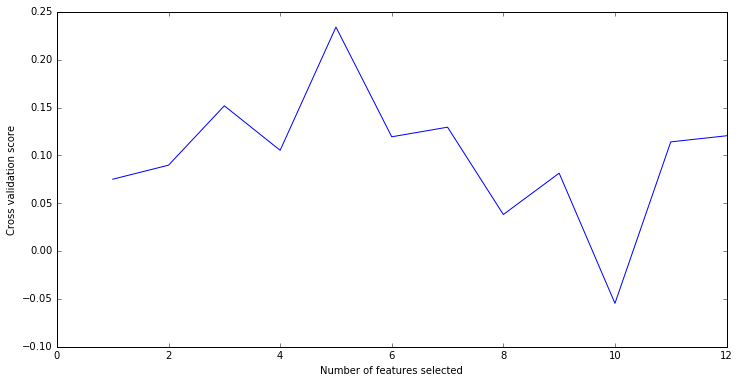

In [38]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

rfecv = RFECV(model, step=1, cv=10)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(12, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [39]:
# [0'ppn','FileSysIn','FileSysOut','InvolCtxtSwitch', 'MajorFaults',5'MaxRSS', 
# 6'MinorFaults', 'PageSize', 'VolCtxtSwitch','sizeGB','Percentcpu','memGB']

In [40]:
importance = rfecv.ranking_
indice = np.argsort(importance)[::+1] #Returns the indices that would sort an array

for f in range(X.shape[1]):
    print("%d. feature %s %s..................(Rank=%f)" % 
          (f+1, indice[f], X.columns.values[indice[f]], importance[indice[f]]))

1. feature 1 FileSysIn..................(Rank=1.000000)
2. feature 5 MaxRSS..................(Rank=1.000000)
3. feature 6 MinorFaults..................(Rank=1.000000)
4. feature 8 VolCtxtSwitch..................(Rank=1.000000)
5. feature 9 sizeGB..................(Rank=1.000000)
6. feature 2 FileSysOut..................(Rank=2.000000)
7. feature 3 InvolCtxtSwitch..................(Rank=3.000000)
8. feature 0 ppn..................(Rank=4.000000)
9. feature 11 memGB..................(Rank=5.000000)
10. feature 10 Percentcpu..................(Rank=6.000000)
11. feature 7 PageSize..................(Rank=7.000000)
12. feature 4 MajorFaults..................(Rank=8.000000)
